# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Muhammad Firdaus
- **Email:** firdauspdr20@gmail.com
- **ID Dicoding:** MC211D5Y2137

## Menentukan Pertanyaan Bisnis

*   Apakah hari kerja memiliki lebih banyak penyewaan sepeda dibandingkan hari libur?
*    Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

**▶ Mengimpor segala library yang akan digunakan dalam analisis data ini**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

**▶ Menghubungkan drive dengan colab, supaya file yang akan digunakan yang disimpan di drive bisa digunakan**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

**Tabel Day**

**▶ Memuat dataset**
- code ini digunakan untuk membaca file csv yang sudah disimpan di drive, kemudian menampilkan 5 baris pertama untuk melihat struktur data nya


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**▶ Hasil:**
- Dataset menampilkan 5 baris pertama dari keseluruhan struktur data yang ada

**▶ Menampilkan jumlah baris & kolom**

In [ ]:
print('Jumlah baris & kolom: ', day_df.shape)

Jumlah baris & kolom:  (731, 16)


**Tabel Hour**

**▶ Memuat dataset**
- code ini digunakan untuk membaca file csv yang sudah disimpan di drive, kemudian menampilkan 5 baris pertama untuk melihat struktur data nya

In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**▶ Hasil:**
- Menampilkan 5 baris pertama dari keseluruhan struktur data yang ada

**▶ Menampilkan jumlah baris & kolom yang ada**

In [ ]:
print('Jumlah baris & kolom: ', hour_df.shape)

Jumlah baris & kolom:  (17379, 17)


**▶ Insight:**
- Tabel Day:
  - Data ini memiliki jumlah 731 baris & 16 kolom
  - Data berisi jumlah penyewaan sepeda per hari
- Tabel Hour:
  - Data ini memiliki jumlah 17379 baris & 17 kolom
  - Data berisi jumlah penyewaan per jam

### Assessing Data

**Tabel Day**

**▶ Memeriksa struktur data**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**▶ Keterangan:**
- Data terdiri dari 731 bari & 16 kolom
- kolom `dteday` masih dalam format **'object'**, sebaiknya diubah ke **'datetime'** untuk analisis waktu
- kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` masih dalam format **'integer'** sebaiknya diubah ke '**category'**

**▶ Mengecek missing value**

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**▶ Keterangan:**
- Tidak ada missing value pada dataset ini

**▶ Mengecek duplikasi data**

In [ ]:
day_df.drop_duplicates(inplace=True)
print('Jumlah duplikat: ', day_df.duplicated().sum())
day_df.describe()

Jumlah duplikat:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**▶ Keterangan:**
- Tidak adanya duplikasi data di dataset ini

**Tabel Hour**

**▶ Memeriksa struktur data**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


▶ Keterngan:
- Dataset ini terdiri dari 17379 baris & 17 kolom
- kolom `dteday` masih dalam format **'object'**, sebaiknya diubah ke **'datetime'** untuk analisis waktu
- kolom `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit` masih dalam format **'integer'** sebaiknya diubah ke '**category'**

**▶ Mengecek missing value**

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**▶ Keterangan:**
- Tidak ada missing value di dataset ini

▶ Mengecek duplikasi data:

In [ ]:
hour_df.drop_duplicates(inplace=True)
print('Jumlah duplikat: ', hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikat:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**▶ Keterangan:**
- tidak adanya duplikasi data di dataset ini

Insight:
- Tabel Day:
  - Tipe data: ada tipe data yang sudah sesuai, tetapi ada juga yang lebih baik diganti seperti
      - `dteday` menjadi (**datetime64**)
      - `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` menjadi (**category**)
  - Missing value: tidak ada missing value di dataset ini
  - Duplicate data: tidak ada duplikasi di dataset ini
  - Inaccurate value: tidak ada inaccurate value karena semua nilai sudah berada dalam rentang yang wajar

- Tabel Hour:
  - Tipe data: ada tipe data yang sudah sesuai, tetapi ada juga yang lebih baik diganti seperti
      - `dteday` menjadi (**datetime64**)
      - `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit` menjadi (**category**)
  - Missing value: Tidak ada missing value di dataset ini
  - Duplicate data: tidak ada duplikat di dataset ini
  - Inaccurate value: tidak ada inaccurate value karena semua nilai sudah berada dalam rentang yang wajar

### Cleaning Data

**Tabel Day**

▶ Mengubah kolom `dteday` yang sebelumnya bertipe data **'object'** menjadi **'datetime'**

In [ ]:
datetime_columns = ['dteday']
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

▶ Mengubah kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` yang sebelumnya bertipe data **'integer'** menjadi **'category'**

In [ ]:
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
    day_df[column] = day_df[column].astype('category')

**▶ Memeriksa kembali struktur data:**
- sekarang semua tipe data sudah sesuai

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Tabel Hour**

▶ Mengubah kolom **`dteday`** yang sebelumnya bertipe data **'object'** menjadi **'datetime'**

In [ ]:
datetime_columns = ['dteday']
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

▶ Mengubah kolom `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit` yang sebelumnya bertipe data **'integer'** menjadi **'category'**

In [ ]:
category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
    hour_df[column] = hour_df[column].astype('category')

▶ Memeriksa kembali struktur data:
- sekarang semua tipe data sudah sesuai

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Insight:
- Tabel Day:
  - melakukan perubahan tipe data di beberapa kolom
 dataset seperti season, yr, mnth, holiday, weekday, workingday, weathersi menjadi category & dteday menjadi datetime

- Tabel Hour:
  - melakukan perubahan tipe data di beberapa kolom
 dataset seperti season, yr, mnth, hr, holiday, weekday, workingday, weathersi menjadi category & dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore

**Tabel Day**

**▶ Menampilkan deskripsi data secara menyeluruh**

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**▶ Keterangan:**
- **`dteday`** memiliki rentang waktu dari **1 Januari 2011 hingga 31 Desember 2012**.  
- **`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, dan `weathersit`** adalah variabel kategori dengan jumlah unik terbatas.  
- **`temp`, `atemp`, `hum`, dan `windspeed`** memiliki rentang dan distribusi yang baik tanpa nilai negatif.  
- **`cnt`** (jumlah penyewaan sepeda) memiliki rata-rata sekitar **4504** per hari dengan nilai maksimum **8714**.  

**▶ Menampilkan rata - rata jumlah penyewaan sepeda di hari libur**

In [ ]:
day_df.groupby("holiday")["cnt"].mean()

<ipython-input-20-a52bfc57cfd4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("holiday")["cnt"].mean()


,cnt
holiday,
0,4527.104225
1,3735.000000


**▶ Keterangan:**
- rata - rata penyewaan sepeda dihitung untuk hari libur `holiday = 1` dan hari biasa `holiday = 0`
- rata - rata penyewaan sepeda pada hari libur(`holiday=1`) sebanyak **4527**
- rata - rata penyewaan sepeda pada hari biasa(`holiday=0`) **sebanyak 3735**

**▶ Menampilkan statistik deskripsi untuk jumlah penyewaan sepeda**

In [ ]:
day_df["cnt"].describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


**▶ Keterangan:**
- Data terdiri dari **731** hari pencatatan
- Rata - rata jumlah penyewa sepeda per hari adalah **4504**
- Penyewaan paling sedikir terjadi sebanyak **22** & terbanyak **8174**
- **50%** (median) menunjukkan nilai **4548** mendekati rata - rata
- **25%** data terendah memiliki penyewaan sebanyak **3152** sedangkan **25%** data tertinggi sebanyak **5956**
- standar deviasi menunjukkan adanya variasi yang cukup besar dalam jumlah penyewaan sepeda setiap harinya sebesar **1973**

▶ Menampilkan statistik deskripsi untuk jumlah penyewaan sepeda oleh pengguna **casual** & **registered**

In [ ]:
day_df[["casual", "registered"]].describe()

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


▶ Keterangan:
- pengguna **casual** memiliki rata - rata **848** penyewaan per hari, dengan minimum **2** & maksimum **3410**
- pengguna **registered** memiliki rata - rata **3656** penyewaan per hari, dengan minimum **20** & maksimum **6946**
- median pengguna **casual** **713**, sedangkan **registered** **3662** yang dimana cukup dekat dengan rata - rata masing - masing

▶ Menampilkan total jumlah penyewaan sepeda berdasarkan pengguna **casual** & **registered**

In [ ]:
day_df[["casual", "registered"]].sum()

,0
casual,620017
registered,2672662


▶ Keterangan:
- Total penyewaan oleh **casual user** sebanyak **620.017**
- total penyewaan oleh **registered user** sebanyak **2.672.662**

**Tabel Hour**

**▶ Menampilkan deskripsi data secara menyeluruh**

In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


▶ Keterangan:
- `dteday` memiliki rentang waktu dari **1 Januari 2011 - 31 Desember 2012**
- `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, dan `weathersit`** adalah variabel kategori dengan jumlah unik terbatas  
- **`temp`, `atemp`, `hum`, dan `windspeed`** memiliki distribusi yang baik tanpa nilai negatif
- **`cnt`** (jumlah penyewaan sepeda per jam) memiliki rata-rata sekitar **189** dengan nilai maksimum **977**

▶ Menampilkan rata - rata jumlah penyewaan sepeda berdasarkan jam dalam sehari

In [ ]:
hour_df.groupby("hr")["cnt"].mean().sort_values(ascending=False)

<ipython-input-25-dfb50b478ebd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("hr")["cnt"].mean().sort_values(ascending=False)


,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


▶ Keterangan:
- Jam **17.00 (5 sore)** memiliki rata-rata penyewaan tertinggi (**461 sepeda/jam**)
- Jam **18.00 (6 sore) dan 8.00 (8 pagi)** juga memiliki jumlah penyewaan yang tinggi
- - Aktivitas penyewaan paling rendah terjadi pada **dini hari (jam 3-5 pagi)**, dengan jumlah sewa di bawah **20 sepeda/jam**

▶ Menentukan waktu dalam sehari berdasarkan kolom **hr** (jam), kemudian menghitung rata-rata jumlah penyewaan sepeda untuk setiap kategori waktu

In [ ]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return "Pagi"
    elif 11 <= hour < 16:
        return "Siang"
    elif 16 <= hour < 19:
        return "Sore"
    else:
        return "Malam"

hour_df["time_of_day"] = hour_df["hr"].apply(time_of_day)

hour_df.groupby("time_of_day")["cnt"].mean()

,cnt
time_of_day,
Malam,98.894138
Pagi,208.100688
Siang,249.788679
Sore,399.625229


▶ Keterangan:
- **Sore hari (16:00 - 18:59)** memiliki rata-rata penyewaan tertinggi (**399 sepeda/jam**)
- **Siang hari (11:00 - 15:59)** memiliki rata-rata **249 sepeda/jam**, menunjukkan aktivitas yang masih cukup tinggi
- **Pagi hari (06:00 - 11:59)** memiliki rata-rata **208 sepeda/jam**
- **Malam hari (19:00 - 05:59)** memiliki jumlah penyewaan terendah (**98 sepeda/jam**)

**Insight:**
- Tabel Day:
  - peminjaman sepeda lebih banyak pada hari kerja (4.527/hari) dibandingkan dengan hari libur (3.735/hari)
  - pengguna registered lebih dominan dengan (2.672.662 peminjaman) dibandingkan dengan casual (620.017 peminjaman), menandakan mayoritas pengguna adalah pelanggan tetap
  - peminjaman harian bervariasi mulai dari 22 - 8.714 peminjaman/hari, menandakan ada sebuah fluktuasi besar yang kemungkinan dipengaruhi oleh cuaca atau event tertentu
  - Penyebaran data (standar deviasi) pada pengguna **casual** lebih kecil dibandingkan **registered**, menunjukkan bahwa pola penyewaan registered lebih stabil.

- Tabel Hour:
  - peminjaman terbanyak terjadi pukul 17:00 - 18:00 sekitar (425 - 461) peminjaman
  - peminjaman tersedikit terjadi pukul 03:00 - 04:00 sekitar (6 - 11) peminjaman
  - pola peminjaman berdasarkan waktu nya:
      - Pagi (06:00 - 12:00): 208 peminjamanan [rata - rata]
      - Siang (12:00 - 16:00): 250 peminjaman [rata - rata]
      - Sore (16:00 - 19:00): 400 peminjaman [tertinggi]
      - Malam (19:00 - 06:00): 99 peminjaman [terendah]
  - Mayoritas penyewaan terjadi pada **jam 17.00 (5 sore)**

## Visualization & Explanatory Analysis

### Pertanyaan 1 (Apakah ada pengaruh hari libur dengan jumlah peminjaman sepeda ?):

▶ Membuat visualisasi pengaruh `hari libur` terhadap jumlah peminjaman sepeda menggunakan **barplot**

<ipython-input-27-33641f4de4c5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=day_df['holiday'], y=day_df['cnt'], ci=None, palette=['#1f77b4', '#ff7f0e'])
<ipython-input-27-33641f4de4c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=day_df['holiday'], y=day_df['cnt'], ci=None, palette=['#1f77b4', '#ff7f0e'])


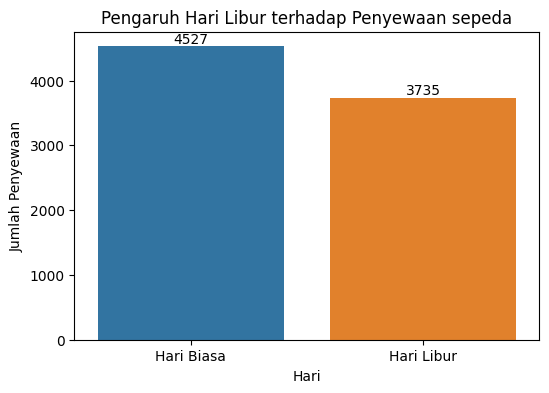

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=day_df['holiday'], y=day_df['cnt'], ci=None, palette=['#1f77b4', '#ff7f0e'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pengaruh Hari Libur terhadap Penyewaan sepeda')
plt.show()

▶ Berdasarkan **barplot** ini, ada beberapa poin yang dapat dijelaskan:
  - Perbandingan Peminjaman Sepeda:
    - Pada `hari biasa` rata - rata jumlah penyewaan sepeda adalah **4.527** per hari
    - Pada `hari libur` rata - rata jumlah penyewaan sepeda adalah **3.735** per hari
  - Analisis Tren:
    - Penyewaan tertinggi terjadi pada `hari biasa` dibandingkan `hari libur`
    - Hal ini dikarenakan oleh aktivitas rutin seperti pergi kerja atau sekolah pada `hari biasa`
    - pada `hari libur` peminjaman menurun karena kemungkinan lebih sedikit orang yang berpergian untuk keperluan rutin
  - Interpretasi Visualisasi:
    - Perbedaan jumlah penyewaan cukup signifikan antara kedua tipe hari, sehingga menimbulkan selisih sekitar **792**

### Pertanyaan 2 (Bagaimana pola pengguna baru dibandingkan dengan pengguna lama?):

▶ Visualisasi Pola Penggunaan Sepeda Berdasarkan Waktu (Pengguna Baru & Pengguna Lama)

<ipython-input-28-d261b8eaff4d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_avg = hour_df.groupby("hr")[["casual", "registered"]].mean()


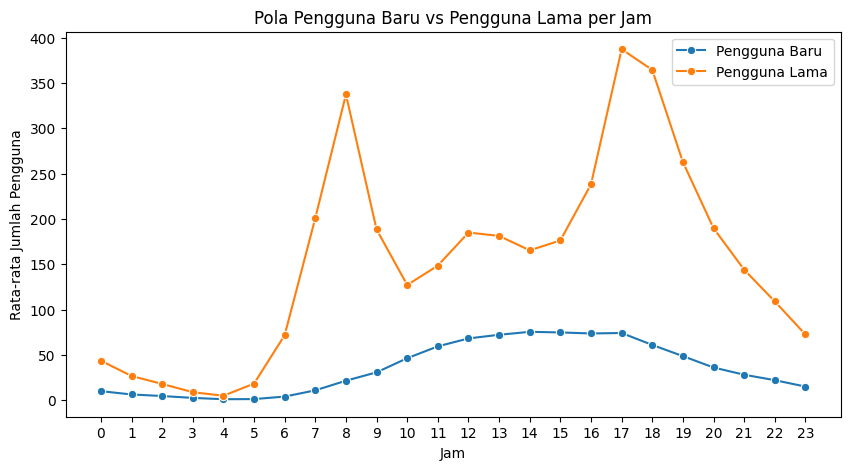

In [ ]:
hourly_avg = hour_df.groupby("hr")[["casual", "registered"]].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg["casual"], label="Pengguna Baru", marker="o")
sns.lineplot(x=hourly_avg.index, y=hourly_avg["registered"], label="Pengguna Lama", marker="o")

plt.title("Pola Pengguna Baru vs Pengguna Lama per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Pengguna")
plt.xticks(range(0, 24))

plt.legend()
plt.show()

▶ Penjelasan Line Chart (Pola Pengguna Baru vs Pengguna Lama) per Jam

- Analisis Data (registered):
  - puncak peminjaman terjadi di jam (**08:00**) & sore (**17:00-18:00**), dimana ini sesuai dengan jam berangkat dan pulang kerja/sekolah
  - penurunan drastis terjadi di malam hari
- Analisis Data (Casual):
  - tidak memiliki lonjakan **ekstrem**, tetapi ada peningkatan di siang hingga sore sekitar jam (**10:00-17:00**)
  - menunjukkan bahwa pengguna baru lebih banyak menyewa untuk jalan-jalan santai dibanding dengan transportasi rutin
- Perbedaan Pola Penggunaan:
  - pengguna lama lebih bergantung pada sepeda untuk mobilitas transportasi harian
  - pengguna baru lebih fleksibel, dengan peminjaman lebih stabil sepanjang hari

# Analisis Lanjutan (RFM Analysis)

▶ Analisis **Recency, Frequency, Monetary (RFM)** digunakan untuk melihat pola peminjaman sepeda berdasarkan hari dalam seminggu.  
Kode berikut menghitung **frekuensi peminjaman (F), total peminjaman (M), dan waktu terakhir peminjaman (R)** untuk setiap hari.

In [ ]:
df = day_df.copy()
recent_date = df["dteday"].max()

rfm_df = df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "count",
    "cnt": "sum"
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date.date() - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

print(rfm_df)

  weekday  frequency  monetary  recency
0       0        105    444027        1
1       1        105    455503        0
2       2        104    469109        6
3       3        104    473048        5
4       4        104    485395        4
5       5        104    487790        3
6       6        105    477807        2


<ipython-input-32-9236ad6db371>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = df.groupby(by="weekday", as_index=False).agg({


▶ Keterangan:
- `Peminjaman tertinggi` terjadi pada **Jumat (487,790 transaksi)**  
- `Peminjaman terendah` terjadi pada **Minggu (444,027 transaksi)**  
- `Frekuensi peminjaman cukup stabil`, berkisar **104-105 kali per hari**  
- Data ini bisa digunakan untuk mengatur jumlah sepeda sesuai tren peminjaman harian.

▶ Membuat visualisasi untuk Recency, Frequency & Monetary

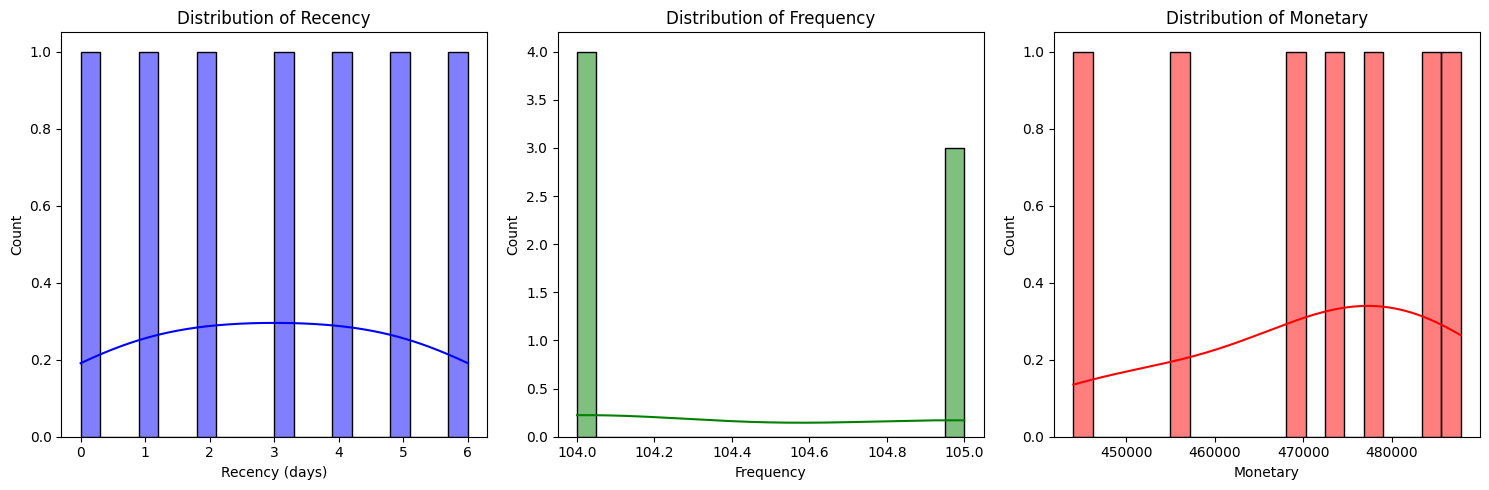

In [ ]:
plt.figure(figsize=(15, 5))

# Histogram untuk Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_df["recency"], bins=20, kde=True, color="blue")
plt.xlabel("Recency (days)")
plt.ylabel("Count")
plt.title("Distribution of Recency")

# Histogram untuk Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_df["frequency"], bins=20, kde=True, color="green")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Distribution of Frequency")

# Histogram untuk Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_df["monetary"], bins=20, kde=True, color="red")
plt.xlabel("Monetary")
plt.ylabel("Count")
plt.title("Distribution of Monetary")

plt.tight_layout()
plt.show()

- `Recency:` Distribusi menunjukkan bahwa sebagian besar pengguna meminjam sepeda dalam **rentang 0-5 hari terakhir**, menandakan pelanggan aktif.  
- `Frequency:` Sebagian besar pengguna melakukan peminjaman dalam **frekuensi yang relatif tinggi**, menunjukkan keterlibatan yang konsisten.  
- `Monetary:` Total jumlah peminjaman tersebar cukup merata, tetapi ada kecenderungan peningkatan pada nilai tertentu.  

# Conclusion

- **Conclusion pertanyaan 1:**
  - Penyewaan tertinggi terjadi pada hari biasa dibandingkan hari libur
  - Hal ini dikarenakan oleh aktivitas rutin seperti pergi kerja atau sekolah pada hari biasa pada hari libur peminjaman menurun karena kemungkinan lebih sedikit orang yang berpergian untuk keperluan rutin
- **Conclusion pertanyaan 2:**
  - pengguna lama (registered) memiliki frekuensi peminjaman yang lebih tinggi dibandingkan dengan pengguna baru (casual)
  - pengguna lama lebih bergantung pada sepeda untuk mobilitas transportasi harian
  - pengguna baru lebih fleksibel, dengan peminjaman lebih stabil sepanjang hari


In [ ]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)